<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_datos_2025/blob/main/pixeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Pillow
import requests
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
url = "https://cdn.pixabay.com/photo/2014/11/30/14/11/cat-551554_640.jpg"
img = requests.get(url)
imagen = np.frombuffer(img.content, np.uint8)
imagen_real = cv2.imdecode(imagen,  cv2.COLOR_BGR2RGB)


In [ ]:
#Veamos las dimensiones de la matriz (alto, ancho, profundidad)
#la profundidad 3 para imágenes RGB y 4 para imágenes RGBA (con canal alfa para transparencia).
imagen_real.shape

(640, 612, 3)

In [ ]:
#Aqui solo vemos el tamaño de la imagen adquierida
imagen_real.size

1175040

array([[[ 0,  0,  1],
        [ 0,  0,  1],
        [ 0,  0,  1],
        ...,
        [ 0,  0,  6],
        [ 0,  0,  6],
        [ 0,  0,  6]],

       [[ 0,  0,  1],
        [ 0,  0,  1],
        [ 0,  0,  1],
        ...,
        [ 0,  0,  6],
        [ 0,  0,  6],
        [ 0,  0,  6]],

       [[ 0,  0,  1],
        [ 0,  0,  1],
        [ 0,  0,  1],
        ...,
        [ 0,  0,  6],
        [ 0,  0,  6],
        [ 0,  0,  6]],

       ...,

       [[39, 53, 76],
        [35, 49, 72],
        [33, 47, 70],
        ...,
        [ 9, 10, 14],
        [ 6,  7, 11],
        [ 0,  0,  4]],

       [[37, 51, 74],
        [28, 42, 65],
        [34, 48, 71],
        ...,
        [10, 11, 15],
        [ 8,  9, 13],
        [ 3,  4,  8]],

       [[34, 48, 71],
        [22, 36, 59],
        [38, 52, 75],
        ...,
        [ 9, 10, 14],
        [ 7,  8, 12],
        [ 5,  6, 10]]], dtype=uint8)
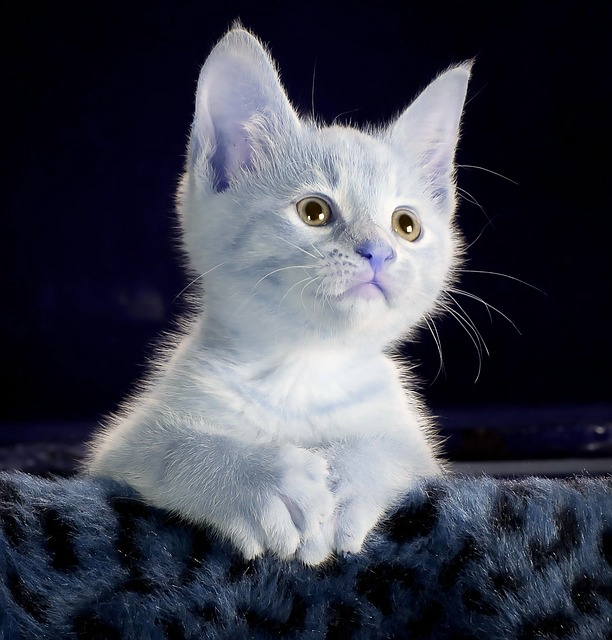

In [ ]:
imagen_real

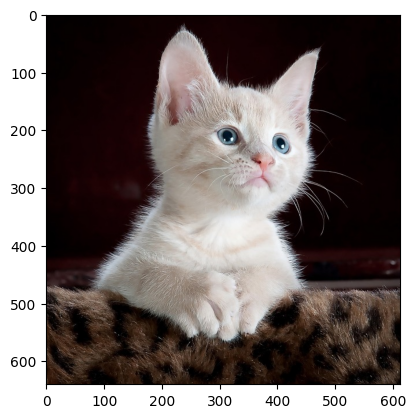

In [ ]:
plt.imshow(cv2.cvtColor(imagen_real, cv2.COLOR_BGR2RGB))
plt.show()

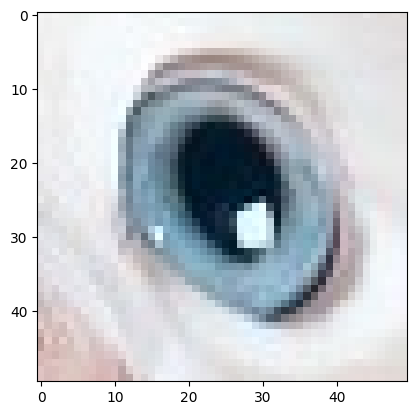

In [ ]:
# Función para seleccionar un grupo de píxeles en una imagen
def select_pixels(image, start_point, width, height):
    pixels = image[start_point[1]:start_point[1] + height, start_point[0]:start_point[0] + width]
    return pixels


# Especificar la posición y el tamaño del rectángulo
punto_inicio = (380, 200)  # Coordenadas de inicio del rectángulo (x, y)
width = 50 # Ancho del rectángulo en píxeles
height = 50  # Altura del rectángulo en píxeles

# Seleccionar el grupo de píxeles dentro del rectángulo
pixels_seleccionados = select_pixels(imagen_real, punto_inicio, width, height)

plt.imshow(cv2.cvtColor(pixels_seleccionados, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
pixels_seleccionados.shape

(50, 50, 3)

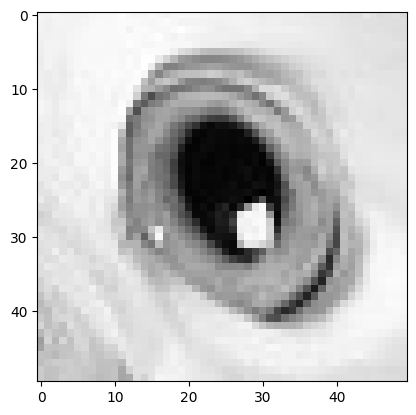

In [ ]:
pixels_seleccionados = np.ascontiguousarray(pixels_seleccionados)
imagen_gris = cv2.cvtColor(pixels_seleccionados, cv2.COLOR_BGR2GRAY)

plt.imshow(imagen_gris, cmap='gray')
plt.show()

El hecho de que la imagen tenga forma (200, 200) en lugar de (200, 200, 1) no significa necesariamente que esté en escala de grises. En OpenCV, cuando una imagen está en escala de grises, se representa como una matriz 2D, donde cada elemento representa la intensidad del píxel en esa posición.

In [ ]:
imagen_gris.shape

(50, 50)

In [ ]:
pixels_seleccionados.size

7500

#NIVEL DE BRILLO

In [ ]:

def calcular_nivel_brillo(pixels):
    # Convertir la imagen a escala de grises si aún no lo está
    if len(pixels.shape) > 2:
        pixels = cv2.cvtColor(pixels, cv2.COLOR_BGR2GRAY)
    # Calcular el nivel de brillo promedio
    media_umbral = np.mean(pixels)
    return media_umbral

# Calcular el nivel de brillo del grupo de píxeles seleccionado
nivel_brillo = calcular_nivel_brillo(pixels_seleccionados)
nivel_original = calcular_nivel_brillo(imagen_real)

print("Nivel de brillo promedio del grupo de píxeles seleccionado:", nivel_brillo)
print(f"Nivel de brillo promedio de la imagen original: {nivel_original}")

Nivel de brillo promedio del grupo de píxeles seleccionado: 193.6556
Nivel de brillo promedio de la imagen original: 69.89544270833333
